14:39:10 - cmdstanpy - INFO - Chain [1] start processing
14:39:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


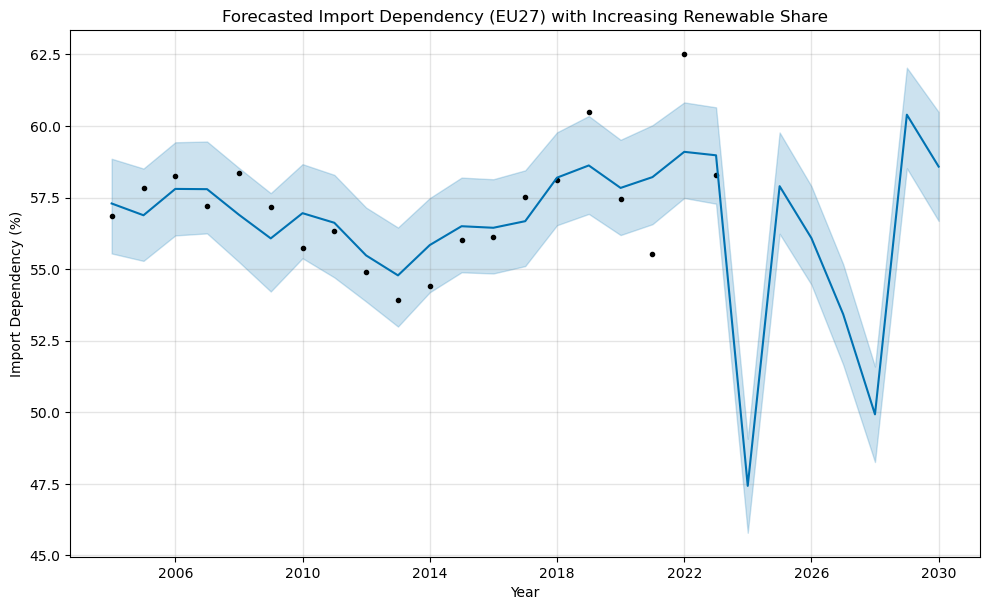

,ds,yhat,yhat_lower,yhat_upper
17,2021-01-01,58.212148,56.567270,60.025157
18,2022-01-01,59.095001,57.482886,60.821276
19,2023-01-01,58.973952,57.283904,60.649698
20,2023-12-31,47.429218,45.790293,49.074365
21,2024-12-31,57.895580,56.232242,59.771407
22,2025-12-31,56.081705,54.456048,57.894665
23,2026-12-31,53.423365,51.659046,55.169795
24,2027-12-31,49.926375,48.260010,51.597701
25,2028-12-31,60.392737,58.519504,62.034560
26,2029-12-31,58.578862,56.680550,60.486369


In [6]:
# Step 1: Import Prophet
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Filter data for a single country (e.g., EU-27)
eu_df = merged_df[merged_df["Country"] == "European Union - 27 countries (from 2020)"].copy()

# Step 3: Prepare for Prophet
eu_df["ds"] = pd.to_datetime(eu_df["Year"], format='%Y')  # Prophet requires 'ds' and 'y'
eu_df = eu_df.rename(columns={"Import_Dependency": "y"})

# Step 4: Create and Fit Prophet model
model = Prophet()
model.add_regressor('RE_Share')
model.fit(eu_df[["ds", "y", "RE_Share"]])

# Step 5: Create future dataframe (next 7 years)
future = model.make_future_dataframe(periods=7, freq='Y')

# Step 6: Extend RE_Share values — assume steady increase of 0.75% per year
last_RE = eu_df["RE_Share"].iloc[-1]
future_RE = [last_RE + 0.75 * (i + 1) for i in range(7)]
future["RE_Share"] = list(eu_df["RE_Share"]) + future_RE

# Step 7: Predict
forecast = model.predict(future)

# Step 8: Plot
fig = model.plot(forecast)
plt.title("Forecasted Import Dependency (EU27) with Increasing Renewable Share")
plt.xlabel("Year")
plt.ylabel("Import Dependency (%)")
plt.grid(True)
plt.show() 
# Optional: Show forecast table
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


In [9]:
import pandas as pd

# Load the file and skip the header row
df = pd.read_excel("C:/Users/rites/Downloads/en prod.xlsx", sheet_name="Sheet1", skiprows=1)

# Rename first column
df.rename(columns={df.columns[0]: 'Country'}, inplace=True)

# Replace ':' with NaN
df.replace(":", pd.NA, inplace=True)

# Convert all year columns to numeric
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where all year values are NaN
df.dropna(subset=df.columns[1:], how='all', inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Preview cleaned data
df.head()


,Country,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,European Union - 27 countries (from 2020),NaN,NaN,NaN,NaN,NaN,5.651,5.564,5.738,5.870,...,7.727,7.801,7.879,7.931,8.139,8.425,8.664,8.687,9.412,9.844
1,Belgium,NaN,NaN,NaN,NaN,NaN,4.588,4.382,4.486,4.464,...,6.419,6.459,6.159,6.174,6.283,6.405,6.783,6.467,7.242,7.839
2,Bulgaria,NaN,NaN,NaN,NaN,NaN,1.152,1.226,1.171,1.264,...,2.202,2.178,2.293,2.276,2.343,2.457,2.505,2.481,2.546,2.944
3,Czechia,NaN,NaN,NaN,NaN,NaN,2.581,2.615,2.578,2.651,...,3.919,4.109,4.255,4.289,4.393,4.624,4.663,4.577,4.807,5.229
4,Denmark,9.146,8.492,8.996,8.577,8.662,8.962,8.268,9.179,9.501,...,14.009,14.340,14.473,14.926,15.130,15.718,16.854,17.228,18.021,18.808


In [19]:
import pandas as pd

# Step 1: Load dataset with proper header row
df = pd.read_excel("C:/Users/rites/Downloads/en prod.xlsx", sheet_name="Sheet1", header=0)

# Step 2: Drop the metadata row (Row 1: 'GEO (Labels)')
df = df[df["TIME"] != "GEO (Labels)"]

# Step 3: Rename 'TIME' column to 'Country'
df.rename(columns={"TIME": "Country"}, inplace=True)

# Step 4: Replace ':' with NaN and convert all year columns to numeric
df.replace(":", pd.NA, inplace=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Step 5: Drop rows with all NaN values across years
df.dropna(subset=df.columns[1:], how="all", inplace=True)

# Optional: Reset index
df.reset_index(drop=True, inplace=True)

# Preview cleaned data
print(df.head())


                                     Country   1990   1991   1992   1993  \
0  European Union - 27 countries (from 2020)    NaN    NaN    NaN    NaN   
1                                    Belgium    NaN    NaN    NaN    NaN   
2                                   Bulgaria    NaN    NaN    NaN    NaN   
3                                    Czechia    NaN    NaN    NaN    NaN   
4                                    Denmark  9.146  8.492  8.996  8.577   

    1994   1995   1996   1997   1998  ...    2014    2015    2016    2017  \
0    NaN  5.651  5.564  5.738  5.870  ...   7.727   7.801   7.879   7.931   
1    NaN  4.588  4.382  4.486  4.464  ...   6.419   6.459   6.159   6.174   
2    NaN  1.152  1.226  1.171  1.264  ...   2.202   2.178   2.293   2.276   
3    NaN  2.581  2.615  2.578  2.651  ...   3.919   4.109   4.255   4.289   
4  8.662  8.962  8.268  9.179  9.501  ...  14.009  14.340  14.473  14.926   

     2018    2019    2020    2021    2022    2023  
0   8.139   8.425   8.664   

16:20:16 - cmdstanpy - INFO - Chain [1] start processing
16:20:16 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


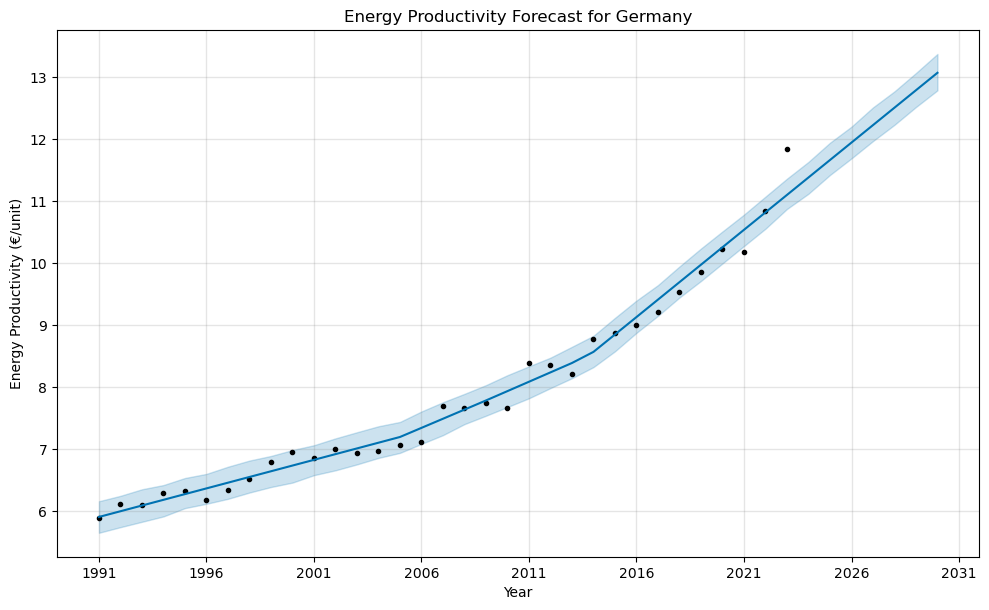

           ds       yhat  yhat_lower  yhat_upper  YoY_change
29 2020-01-01  10.256479    9.995394   10.511521    0.280939
30 2021-01-01  10.538188   10.276373   10.782852    0.281708
31 2022-01-01  10.819126   10.555765   11.073017    0.280939
32 2023-01-01  11.100065   10.873502   11.361604    0.280939
33 2023-12-31  11.380234   11.118251   11.631537    0.280169
34 2024-12-31  11.661943   11.420550   11.940496    0.281708
35 2025-12-31  11.942881   11.687933   12.199427    0.280939
36 2026-12-31  12.223820   11.966518   12.509106    0.280939
37 2027-12-31  12.504759   12.228218   12.767706    0.280939
38 2028-12-31  12.786467   12.515743   13.063919    0.281708
39 2029-12-31  13.067406   12.784631   13.371281    0.280939


C:\Users\rites\AppData\Local\Temp\ipykernel_27232\2811130221.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_result['YoY_change'] = forecast_result['yhat'].diff()


In [20]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Melt the wide-format dataset to long format
df_long = df.melt(id_vars='Country', var_name='Year', value_name='Energy_Productivity')

# Step 2: Filter for a country with complete data (e.g., Germany)
country_name = "Germany"
df_country = df_long[df_long['Country'] == country_name].dropna()

# Step 3: Convert Year to datetime format and rename for Prophet
df_country['ds'] = pd.to_datetime(df_country['Year'], format='%Y')
df_country['y'] = pd.to_numeric(df_country['Energy_Productivity'], errors='coerce')
df_prophet = df_country[['ds', 'y']]

# Step 4: Fit Prophet model
model = Prophet(yearly_seasonality=False)
model.fit(df_prophet)

# Step 5: Make future dataframe up to 2030
future = model.make_future_dataframe(periods=7, freq='Y')  # Forecasts 2024–2030
forecast = model.predict(future)

# Step 6: Plot forecast
fig = model.plot(forecast)
plt.title(f"Energy Productivity Forecast for {country_name}")
plt.xlabel("Year")
plt.ylabel("Energy Productivity (€/unit)")
plt.grid(True)
plt.show()

# Step 7: Print forecasted values from 2020 onward
forecast_result = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_result['YoY_change'] = forecast_result['yhat'].diff()
print(forecast_result[forecast_result['ds'].dt.year >= 2020])


In [21]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("C:/Users/rites/Downloads/en prod.xlsx", sheet_name="Sheet1", header=0)
df = df[df["TIME"] != "GEO (Labels)"]
df.rename(columns={"TIME": "Country"}, inplace=True)
df.replace(":", pd.NA, inplace=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df.dropna(subset=df.columns[1:], how="all", inplace=True)
df.reset_index(drop=True, inplace=True)

# Melt to long format
df_long = df.melt(id_vars='Country', var_name='Year', value_name='Energy_Productivity')
df_long['Energy_Productivity'] = pd.to_numeric(df_long['Energy_Productivity'], errors='coerce')
df_long['Year'] = pd.to_datetime(df_long['Year'], format='%Y', errors='coerce')

# Run forecast for each country
all_forecasts = []
valid_countries = df_long.groupby('Country')['Energy_Productivity'].apply(lambda x: x.notna().sum())
valid_countries = valid_countries[valid_countries >= 2].index.tolist()

for country in valid_countries:
    df_country = df_long[df_long['Country'] == country].dropna()
    df_prophet = df_country[['Year', 'Energy_Productivity']].rename(columns={'Year': 'ds', 'Energy_Productivity': 'y'})

    try:
        model = Prophet(yearly_seasonality=False)
        model.fit(df_prophet)
        future = model.make_future_dataframe(periods=7, freq='Y')
        forecast = model.predict(future)

        forecast = forecast[['ds', 'yhat']].copy()
        forecast['Country'] = country
        forecast['YoY_change'] = forecast['yhat'].diff()
        forecast = forecast[forecast['ds'].dt.year >= 2020]

        all_forecasts.append(forecast)
    except:
        continue

# Combine results
final_forecast = pd.concat(all_forecasts, ignore_index=True)

# Save to Excel
final_forecast.to_excel("Energy_Productivity_Forecasts_2020_2030.xlsx", index=False)
print("Forecasts saved to Energy_Productivity_Forecasts_2020_2030.xlsx")


16:21:15 - cmdstanpy - INFO - Chain [1] start processing
16:21:15 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:21:15 - cmdstanpy - INFO - Chain [1] start processing
16:21:16 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:21:16 - cmdstanpy - INFO - Chain [1] start processing
16:21:16 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:21:16 - cmdstanpy - IN

✅ Forecasts saved to Energy_Productivity_Forecasts_2020_2030.xlsx


16:23:46 - cmdstanpy - INFO - Chain [1] start processing
16:23:46 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


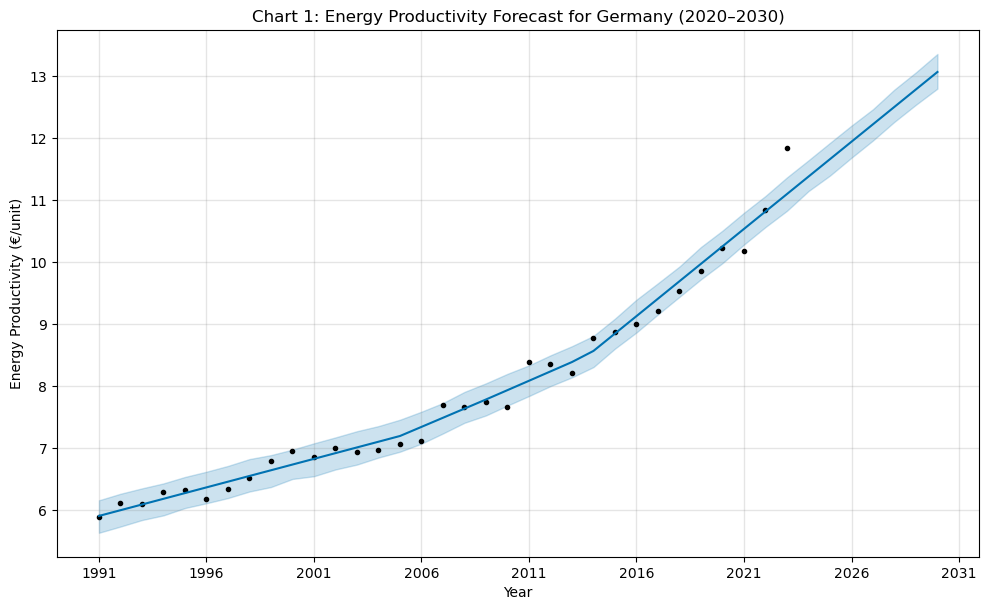


Table 1: Forecast Values and Year-over-Year Change

 Year  Forecast (€/unit)  YoY Change (€/unit)
 2020              10.26                 0.28
 2021              10.54                 0.28
 2022              10.82                 0.28
 2023              11.10                 0.28
 2023              11.38                 0.28
 2024              11.66                 0.28
 2025              11.94                 0.28
 2026              12.22                 0.28
 2027              12.50                 0.28
 2028              12.79                 0.28
 2029              13.07                 0.28


In [22]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# === Step 1: Load and clean data ===
df = pd.read_excel("C:/Users/rites/Downloads/en prod.xlsx", sheet_name="Sheet1", header=0)
df = df[df["TIME"] != "GEO (Labels)"]
df.rename(columns={"TIME": "Country"}, inplace=True)
df.replace(":", pd.NA, inplace=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df.dropna(subset=df.columns[1:], how="all", inplace=True)
df.reset_index(drop=True, inplace=True)

# === Step 2: Melt to long format ===
df_long = df.melt(id_vars='Country', var_name='Year', value_name='Energy_Productivity')
df_long['Year'] = pd.to_datetime(df_long['Year'], format='%Y', errors='coerce')
df_long['Energy_Productivity'] = pd.to_numeric(df_long['Energy_Productivity'], errors='coerce')

# === Step 3: Select country and prepare Prophet input ===
country = "Germany"
df_country = df_long[df_long['Country'] == country].dropna()
df_prophet = df_country[['Year', 'Energy_Productivity']].rename(columns={'Year': 'ds', 'Energy_Productivity': 'y'})

# === Step 4: Forecast using Prophet ===
model = Prophet(yearly_seasonality=False)
model.fit(df_prophet)
future = model.make_future_dataframe(periods=7, freq='Y')  # 2024–2030
forecast = model.predict(future)

# === Step 5: Prepare Table 1 ===
forecast_result = forecast[['ds', 'yhat']].copy()
forecast_result['YoY_change'] = forecast_result['yhat'].diff()
forecast_result = forecast_result[forecast_result['ds'].dt.year >= 2020]
forecast_result['Year'] = forecast_result['ds'].dt.year
forecast_table = forecast_result[['Year', 'yhat', 'YoY_change']].copy()
forecast_table.columns = ['Year', 'Forecast (€/unit)', 'YoY Change (€/unit)']
forecast_table = forecast_table.round(2)

# === Step 6: Plot Chart 1 ===
fig = model.plot(forecast)
plt.title(f"Chart 1: Energy Productivity Forecast for {country} (2020–2030)")
plt.xlabel("Year")
plt.ylabel("Energy Productivity (€/unit)")
plt.grid(True)
plt.show()

# === Step 7: Print Table 1 ===
print("\nTable 1: Forecast Values and Year-over-Year Change\n")
print(forecast_table.to_string(index=False))


In [23]:
import pandas as pd
from prophet import Prophet

# Load dataset
df = pd.read_excel("C:/Users/rites/Downloads/en prod.xlsx", sheet_name="Sheet1", header=0)
df = df[df["TIME"] != "GEO (Labels)"]
df.rename(columns={"TIME": "Country"}, inplace=True)
df.replace(":", pd.NA, inplace=True)

# Convert year columns to numeric
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df.dropna(subset=df.columns[1:], how="all", inplace=True)
df.reset_index(drop=True, inplace=True)

# Melt to long format
df_long = df.melt(id_vars='Country', var_name='Year', value_name='Energy_Productivity')
df_long['Year'] = pd.to_datetime(df_long['Year'], format='%Y', errors='coerce')
df_long['Energy_Productivity'] = pd.to_numeric(df_long['Energy_Productivity'], errors='coerce')

# Filter years from 1990 to 2023
df_long = df_long[df_long['Year'].dt.year.between(1990, 2023)]

# Identify countries with 2+ valid data points
valid_countries = df_long.groupby('Country')['Energy_Productivity'].apply(lambda x: x.notna().sum())
valid_countries = valid_countries[valid_countries >= 2].index.tolist()

# Forecast for each country
all_results = []
for country in valid_countries:
    df_country = df_long[df_long['Country'] == country].dropna()
    df_prophet = df_country.rename(columns={'Year': 'ds', 'Energy_Productivity': 'y'})

    try:
        model = Prophet(yearly_seasonality=False)
        model.fit(df_prophet)

        # Predict only existing years
        future = model.make_future_dataframe(periods=0, freq='Y')
        forecast = model.predict(future)

        forecast = forecast[['ds', 'yhat']].copy()
        forecast['Country'] = country
        forecast['YoY_change'] = forecast['yhat'].diff()
        forecast = forecast[forecast['ds'].dt.year.between(1990, 2023)]
        forecast['Year'] = forecast['ds'].dt.year
        forecast = forecast[['Country', 'Year', 'yhat', 'YoY_change']].round(2)

        all_results.append(forecast)

    except Exception as e:
        print(f"Skipping {country}: {e}")
        continue

# Combine results
final_forecast_df = pd.concat(all_results, ignore_index=True)
final_forecast_df.rename(columns={'yhat': 'Forecast (€/unit)', 'YoY_change': 'YoY Change (€/unit)'}, inplace=True)

# Export
final_forecast_df.to_excel("EU_Energy_Productivity_Forecast_1990_2023.xlsx", index=False)
print("Forecast saved to EU_Energy_Productivity_Forecast_1990_2023.xlsx")


16:28:09 - cmdstanpy - INFO - Chain [1] start processing
16:28:09 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:28:09 - cmdstanpy - INFO - Chain [1] start processing
16:28:09 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:28:09 - cmdstanpy - INFO - Chain [1] start processing
16:28:09 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:28:10 - cmdstanpy - IN

✅ Forecast saved to EU_Energy_Productivity_Forecast_1990_2023.xlsx


16:29:55 - cmdstanpy - INFO - Chain [1] start processing
16:29:55 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:29:55 - cmdstanpy - INFO - Chain [1] start processing
16:29:56 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:29:56 - cmdstanpy - INFO - Chain [1] start processing
16:29:56 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:29:56 - cmdstanpy - IN

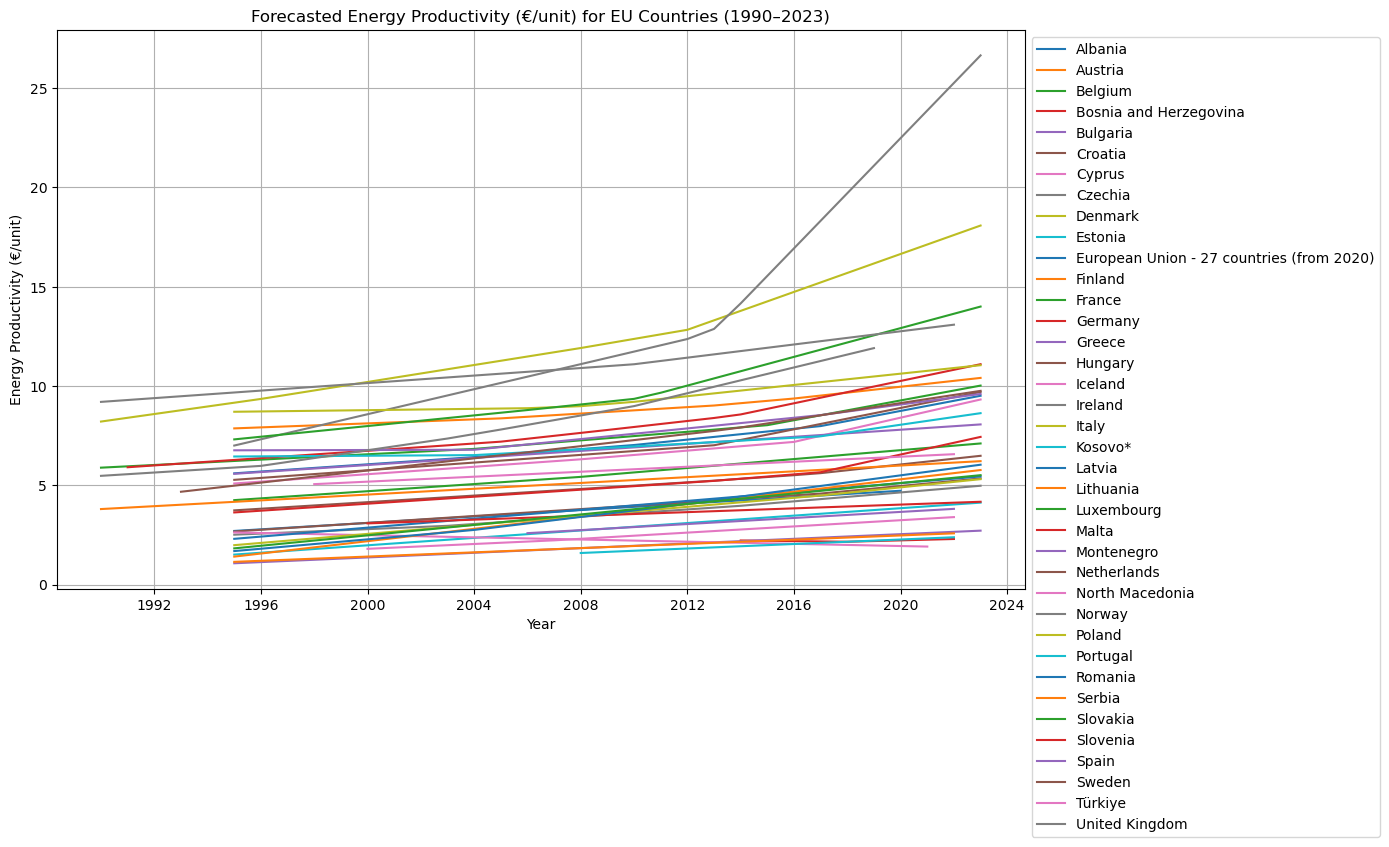

In [24]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_excel("C:/Users/rites/Downloads/en prod.xlsx", sheet_name="Sheet1", header=0)
df = df[df["TIME"] != "GEO (Labels)"]
df.rename(columns={"TIME": "Country"}, inplace=True)
df.replace(":", pd.NA, inplace=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df.dropna(subset=df.columns[1:], how="all", inplace=True)
df.reset_index(drop=True, inplace=True)

# Melt to long format
df_long = df.melt(id_vars='Country', var_name='Year', value_name='Energy_Productivity')
df_long['Year'] = pd.to_datetime(df_long['Year'], format='%Y', errors='coerce')
df_long['Energy_Productivity'] = pd.to_numeric(df_long['Energy_Productivity'], errors='coerce')
df_long = df_long[df_long['Year'].dt.year.between(1990, 2023)]

# Filter for valid countries
valid_countries = df_long.groupby('Country')['Energy_Productivity'].apply(lambda x: x.notna().sum())
valid_countries = valid_countries[valid_countries >= 2].index.tolist()

# Initialize plot
plt.figure(figsize=(14, 8))

# Run Prophet forecast and plot
for country in valid_countries:
    df_country = df_long[df_long['Country'] == country].dropna()
    df_prophet = df_country.rename(columns={'Year': 'ds', 'Energy_Productivity': 'y'})

    try:
        model = Prophet(yearly_seasonality=False)
        model.fit(df_prophet)
        future = model.make_future_dataframe(periods=0, freq='Y')
        forecast = model.predict(future)

        # Filter and prepare forecast data
        forecast = forecast[['ds', 'yhat']]
        forecast = forecast[forecast['ds'].dt.year.between(1990, 2023)]
        plt.plot(forecast['ds'], forecast['yhat'], label=country)

    except Exception as e:
        print(f"Skipping {country}: {e}")
        continue

# Finalize plot
plt.title("Forecasted Energy Productivity (€/unit) for EU Countries (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Productivity (€/unit)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


16:47:08 - cmdstanpy - INFO - Chain [1] start processing
16:47:08 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


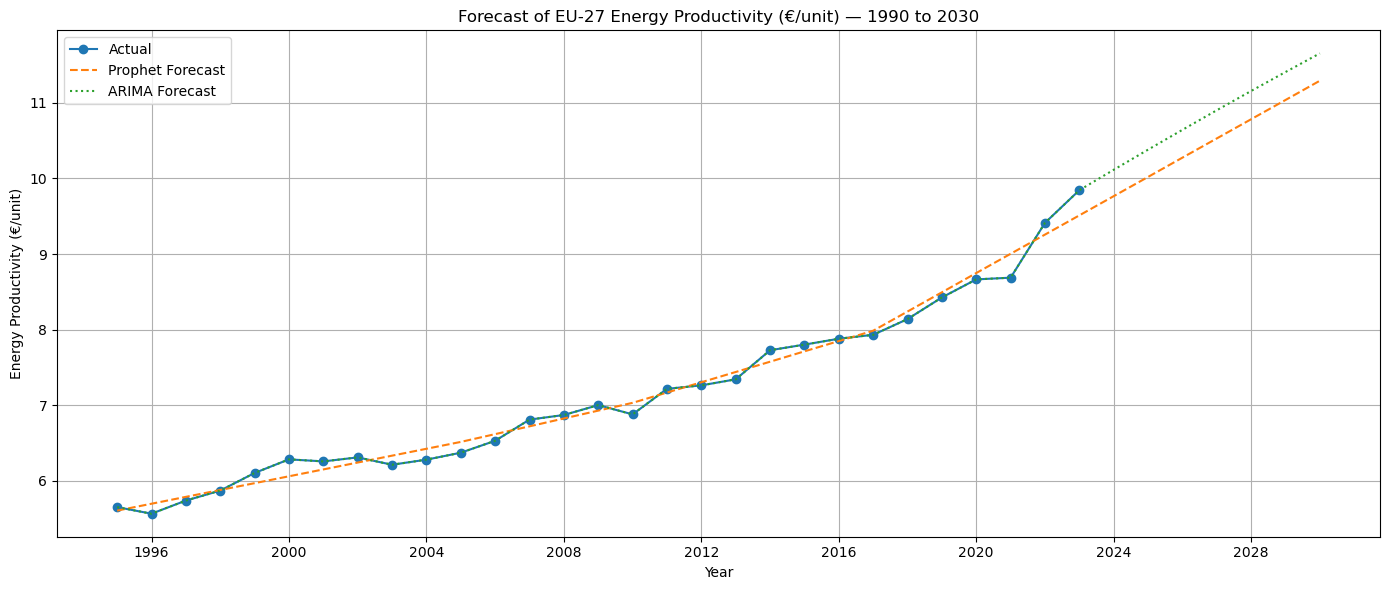


Forecast Comparison Table (1990–2030):
 Year  Prophet Forecast  ARIMA Forecast
 1995             5.605           5.651
 1996             5.696           5.564
 1997             5.787           5.738
 1998             5.878           5.870
 1999             5.968           6.103
 2000             6.059           6.283
 2001             6.150           6.256
 2002             6.241           6.309
 2003             6.332           6.212
 2004             6.423           6.279
 2005             6.514           6.371
 2006             6.617           6.529
 2007             6.720           6.809
 2008             6.824           6.870
 2009             6.928           7.001
 2010             7.031           6.878
 2011             7.167           7.216
 2012             7.303           7.262
 2013             7.439           7.342
 2014             7.575           7.727
 2015             7.712           7.801
 2016             7.848           7.879
 2017             7.985           7.931


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA

# === Step 1: Read the file and extract EU-27 data ===
df_raw = pd.read_excel("C:/Users/rites/Downloads/en prod.xlsx", sheet_name="Sheet1", header=None)
header_row = df_raw.iloc[0]
data_row = df_raw[df_raw[0] == "European Union - 27 countries (from 2020)"].iloc[0]

# === Step 2: Clean and structure the data ===
years, values = [], []
for i, h in enumerate(header_row):
    try:
        year = int(float(h))
        value = data_row[i]
        if value != ":" and pd.notna(value):
            years.append(pd.to_datetime(str(year), format="%Y"))
            values.append(float(value))
    except:
        continue

# Create dataframe for modeling
df = pd.DataFrame({'ds': years, 'y': values})
df_arima = df.set_index('ds').asfreq('YS')

# === Step 3: Prophet Forecast ===
model_prophet = Prophet(yearly_seasonality=False)
model_prophet.fit(df)
future_prophet = model_prophet.make_future_dataframe(periods=2030 - df['ds'].dt.year.max(), freq='YS')
forecast_prophet = model_prophet.predict(future_prophet)
prophet_df = forecast_prophet[['ds', 'yhat']].rename(columns={'yhat': 'Prophet Forecast'})

# === Step 4: ARIMA Forecast ===
model_arima = ARIMA(df_arima['y'], order=(1, 1, 1)).fit()
arima_steps = 2030 - df_arima.index[-1].year
arima_forecast = model_arima.get_forecast(steps=arima_steps)
arima_pred = arima_forecast.predicted_mean
arima_index = pd.date_range(start=df_arima.index[-1] + pd.DateOffset(years=1), periods=arima_steps, freq='YS')
arima_df = pd.DataFrame({'ds': arima_index, 'ARIMA Forecast': arima_pred})

# Include historical ARIMA values
arima_history = df_arima.reset_index().rename(columns={'index': 'ds', 'y': 'ARIMA Forecast'})
arima_full = pd.concat([arima_history, arima_df], ignore_index=True)

# === Step 5: Combine Prophet and ARIMA ===
final_df = pd.merge(prophet_df, arima_full, on='ds', how='outer')
final_df['Year'] = final_df['ds'].dt.year
final_df = final_df[final_df['Year'].between(1990, 2030)].drop_duplicates(subset=['Year']).round(3)

# === Step 6: Plot all ===
plt.figure(figsize=(14, 6))
#plt.plot(df['ds'], df['y'], label='Actual', marker='o')
plt.plot(final_df['ds'], final_df['Prophet Forecast'], label='Prophet Forecast', linestyle='--')
plt.plot(final_df['ds'], final_df['ARIMA Forecast'], label='ARIMA Forecast', linestyle=':')
plt.title("Forecast of EU-27 Energy Productivity (€/unit) — 1990 to 2030")
plt.xlabel("Year")
plt.ylabel("Energy Productivity (€/unit)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Step 7: Print Table ===
print("\nForecast Comparison Table (1990–2030):")
print(final_df[['Year', 'Prophet Forecast', 'ARIMA Forecast']].to_string(index=False))


In [8]:
import pandas as pd

# === Step 1: Safely extract individual values ===
def safe_get(year):
    try:
        val = combined.loc[year]['y']
        if isinstance(val, pd.Series):
            val = val.values[0]  # If multiple rows, take first
        return round(float(val), 3)
    except:
        return None

v_2010 = safe_get(2010)
v_2015 = safe_get(2015)
v_2023 = safe_get(2023)
v_2025 = safe_get(2025)
v_2030 = safe_get(2030)

# === Step 2: Calculate ratios and trend ===
ratio_2025_2015 = round(v_2025 / v_2015, 2) if v_2025 and v_2015 else None
ratio_2030_2015 = round(v_2030 / v_2015, 2) if v_2030 and v_2015 else None
trend = "Up" if ratio_2030_2015 and ratio_2030_2015 > 1 else "Down"

# === Step 3: Create DataFrame in final table format ===
table_df = pd.DataFrame([{
    "Countries": "EU-27",
    "2010": v_2010,
    "2015": v_2015,
    "2023": v_2023,
    "2025f": v_2025,
    "2030f": v_2030,
    "2025/2015": ratio_2025_2015,
    "2030/2015": ratio_2030_2015,
    "Trend": trend
}])

# === Step 4: Display ===
print("\nSummary Table:\n")
print(table_df.to_string(index=False))



Summary Table:

Countries  2010  2015  2023  2025f  2030f  2025/2015  2030/2015 Trend
    EU-27 6.878 7.801 9.844  10.02 11.293       1.28       1.45    Up


CAGR (2023–2030):
BAU:        2.48%
Moderate:   2.92%
Aggressive: 3.34%

Year-over-Year % Change (2024–2030):
       BAU  Moderate  Aggressive
Year                            
2024   NaN       NaN         NaN
2025  2.61      2.61        2.61
2026  2.54      2.54        2.54
2027  2.47      2.47        2.47
2028  2.42      2.42        2.42
2029  2.36      2.36        2.36
2030  2.30      2.30        2.30


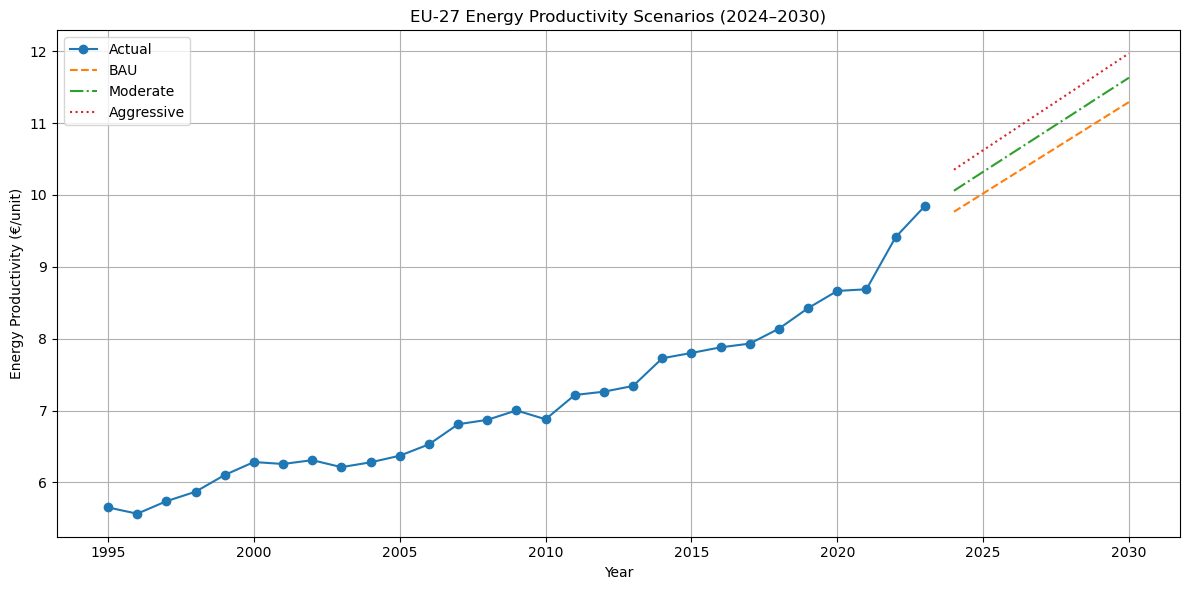

In [10]:
# Step 1: Extract base forecast from Prophet (for 2024–2030)
scenario_base = forecast_prophet[['ds', 'yhat']].copy()
scenario_base['Year'] = scenario_base['ds'].dt.year
scenario_base = scenario_base[scenario_base['Year'].between(2024, 2030)]
scenario_base = scenario_base.set_index('Year')

# Step 2: Create 3 Scenarios
scenarios = pd.DataFrame(index=scenario_base.index)
scenarios['BAU'] = scenario_base['yhat']
scenarios['Moderate'] = scenario_base['yhat'] * 1.03  # +3% growth
scenarios['Aggressive'] = scenario_base['yhat'] * 1.06  # +6% growth

# === Step: CAGR for Each Scenario (2023 to 2030) ===

def calculate_cagr(start_val, end_val, years):
    return round(((end_val / start_val) ** (1 / years)) - 1, 4) if start_val and end_val else None

start_year = 2023
end_year = 2030
years = end_year - start_year

# Get forecasted 2023 value from Prophet
v_2023 = forecast_prophet[forecast_prophet['ds'].dt.year == 2023]['yhat'].values[0]

# Compute CAGR for each scenario
cagr_bau = calculate_cagr(v_2023, scenarios.loc[2030, 'BAU'], years)
cagr_moderate = calculate_cagr(v_2023, scenarios.loc[2030, 'Moderate'], years)
cagr_aggressive = calculate_cagr(v_2023, scenarios.loc[2030, 'Aggressive'], years)

print("CAGR (2023–2030):")
print(f"BAU:        {cagr_bau*100:.2f}%")
print(f"Moderate:   {cagr_moderate*100:.2f}%")
print(f"Aggressive: {cagr_aggressive*100:.2f}%")

# === Step: Year-over-Year % Change Table ===
scenarios_yoy = scenarios.pct_change().round(4) * 100
print("\nYear-over-Year % Change (2024–2030):")
print(scenarios_yoy)

# Step 3: Combine with actual + forecast for plotting
actual_hist = df[df['ds'].dt.year <= 2023][['ds', 'y']].copy()
actual_hist['Year'] = actual_hist['ds'].dt.year
actual_hist = actual_hist.set_index('Year')

# Step 4: Plot all together
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_hist.index, actual_hist['y'], label="Actual", marker='o')
plt.plot(scenario_base.index, scenarios['BAU'], label="BAU", linestyle='--')
plt.plot(scenario_base.index, scenarios['Moderate'], label="Moderate", linestyle='-.')
plt.plot(scenario_base.index, scenarios['Aggressive'], label="Aggressive", linestyle=':')

plt.title("EU-27 Energy Productivity Scenarios (2024–2030)")
plt.xlabel("Year")
plt.ylabel("Energy Productivity (€/unit)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
from prophet.diagnostics import cross_validation, performance_metrics

# === Step: Rolling Cross-Validation ===
# Use 10 years for initial training, test 2-year horizon, shift window by 1 year
df_cv = cross_validation(
    model_prophet,
    initial='3650 days',    # ≈ 10 years
    period='365 days',      # Shift 1 year forward for each test set
    horizon='730 days'      # Forecast 2 years ahead each time
)

# Calculate performance metrics
df_perf = performance_metrics(df_cv)

# === Display key metrics ===
print("\n Prophet Cross-Validation Performance:")
print(df_perf[['horizon', 'mape', 'rmse', 'coverage']])


12:46:29 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing
12:46:29 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing
12:46:29 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing
12:46:29 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing
12:46:29 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing
12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1]


📊 Prophet Cross-Validation Performance:
   horizon      mape      rmse  coverage
0 361 days  0.029355  0.212337  0.000000
1 362 days  0.017805  0.130445  0.500000
2 363 days  0.016094  0.166997  0.500000
3 364 days  0.014683  0.144074  0.500000
4 365 days  0.026417  0.348508  0.500000
5 726 days  0.045494  0.377856  0.166667
6 727 days  0.016728  0.126822  0.750000
7 728 days  0.023774  0.208739  0.500000
8 729 days  0.015549  0.172171  0.500000
9 730 days  0.054123  0.608781  0.333333


C:\Users\rites\AppData\Local\Temp\ipykernel_11792\171496123.py:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rites\AppData\Local\Temp\ipykernel_11792\171496123.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


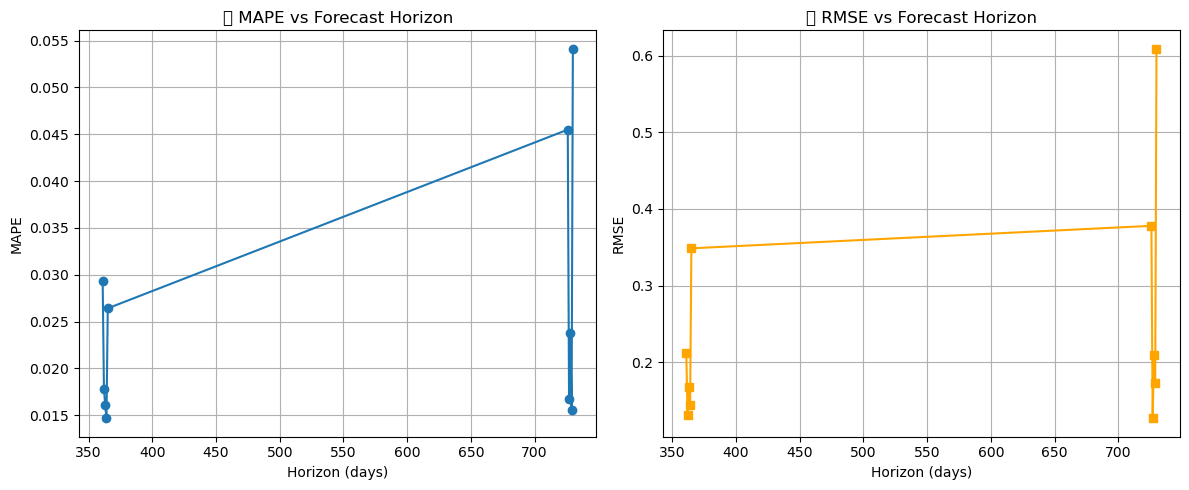

C:\Users\rites\AppData\Local\Temp\ipykernel_11792\171496123.py:35: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


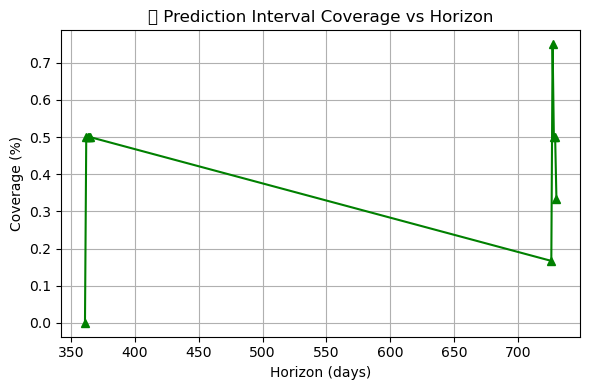

In [12]:
import matplotlib.pyplot as plt

# Ensure 'horizon' is converted to days as integer
df_perf['horizon_days'] = df_perf['horizon'].dt.days

# === Plot MAPE and RMSE vs Horizon ===
plt.figure(figsize=(12, 5))

# MAPE Plot
plt.subplot(1, 2, 1)
plt.plot(df_perf['horizon_days'], df_perf['mape'], marker='o', label='MAPE')
plt.title(" MAPE vs Forecast Horizon")
plt.xlabel("Horizon (days)")
plt.ylabel("MAPE")
plt.grid(True)

# RMSE Plot
plt.subplot(1, 2, 2)
plt.plot(df_perf['horizon_days'], df_perf['rmse'], marker='s', label='RMSE', color='orange')
plt.title(" RMSE vs Forecast Horizon")
plt.xlabel("Horizon (days)")
plt.ylabel("RMSE")
plt.grid(True)

plt.tight_layout()
plt.show()

# === Plot Coverage separately ===
plt.figure(figsize=(6, 4))
plt.plot(df_perf['horizon_days'], df_perf['coverage'], marker='^', color='green')
plt.title(" Prediction Interval Coverage vs Horizon")
plt.xlabel("Horizon (days)")
plt.ylabel("Coverage (%)")
plt.grid(True)
plt.tight_layout()
plt.show()
